# Bike Rental Project

## Exploratory data analysis

I will now perform exploratory data analysis. The target variable initially considered is Rider Satisfaction.

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [7]:
df = pd.read_csv("./biking_dataset.csv", sep= ";")

In [8]:
df.shape

(900, 8)

In [9]:
df.head()

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
0,Berlin,Rainy,53.0,Standard,62.0,"2,25",High,"22,63"
1,San Francisco,Cloudy,39.0,Standard,5.0,"21,67",Medium,"7,87"
2,Berlin,Sunny,43.0,Electric,106.0,"28,4",High,"39,4"
3,San Francisco,Cloudy,24.0,Standard,119.0,"5,66",Low,"37,63"
4,New York,Sunny,24.0,Mountain,11.0,"25,74",Low,"13,12"


In [10]:
df.tail()

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
895,New York,Rainy,55.0,Electric,55.0,"28,35",Medium,"26,3"
896,London,Cloudy,47.0,Mountain,14.0,"11,99",High,"13,78"
897,San Francisco,Sunny,49.0,Mountain,23.0,"2,78",High,"20,47"
898,Chicago,Sunny,19.0,Mountain,110.0,"2,27",High,"39,62"
899,Dublin,Rainy,37.0,Standard,17.0,"9,7",Medium,"13,02"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   890 non-null    object 
 1   Weather Condition      889 non-null    object 
 2   Rider Age              885 non-null    float64
 3   Bike Model             890 non-null    object 
 4   Ride Duration (min)    887 non-null    float64
 5   Distance Covered (km)  887 non-null    object 
 6   Rider Satisfaction     889 non-null    object 
 7   Bike Rental Cost ($)   891 non-null    object 
dtypes: float64(2), object(6)
memory usage: 56.4+ KB


It can be seen that there are missing values in all of the features, as the number of observations is 900 but the maximum number of observations here is 890. 
It can also be seen that some variables that should be numerical, are being taken as if they were categorical.

In order to change the categorical variables into numerical, I will check the cleanliness of the data. I want to know whether the features not only contain commas, but they also contain dots, which might make the interpretation difficult.

In [14]:
df[df["Bike Rental Cost ($)" ].str.find(".") != -1] #Return all rows where a dot is found in Bike Rental Cost 

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
90,Chicago,Rainy,60.0,Standard,73.0,NaN,High,NaN
179,Berlin,Sunny,59.0,Mountain,72.0,"24,96",NaN,NaN
251,London,Cloudy,18.0,Electric,68.0,"15,57",NaN,NaN
342,NaN,Rainy,21.0,Standard,83.0,"28,77",Medium,NaN
463,San Francisco,NaN,57.0,Electric,92.0,"19,05",Low,NaN
630,San Francisco,Snowy,43.0,Standard,113.0,"27,45",NaN,NaN
660,Berlin,Sunny,18.0,Electric,69.0,"15,1",NaN,NaN
794,San Francisco,Cloudy,NaN,Mountain,88.0,"20,44",Low,NaN
856,Chicago,NaN,25.0,Standard,32.0,"3,45",Medium,NaN


In [15]:
df[df["Distance Covered (km)" ].str.find(".") != -1] #I do the same for the distance.

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
15,New York,NaN,41.0,Standard,53.0,NaN,Medium,"21,24"
90,Chicago,Rainy,60.0,Standard,73.0,NaN,High,NaN
119,Dublin,Cloudy,49.0,Mountain,119.0,NaN,Medium,"40,66"
218,NaN,Sunny,31.0,Standard,61.0,NaN,Medium,"20,23"
284,Berlin,Rainy,NaN,Mountain,73.0,NaN,High,"32,13"
295,Berlin,Sunny,60.0,Standard,NaN,NaN,Medium,"35,56"
308,New York,Snowy,37.0,NaN,97.0,NaN,Low,"33,4"
367,Berlin,NaN,51.0,Mountain,65.0,NaN,High,"28,31"
434,San Francisco,Snowy,41.0,Standard,NaN,NaN,Medium,"18,26"
446,Chicago,Snowy,NaN,Standard,16.0,NaN,High,"13,03"


All of the values are NA, so I can proceed to convert into numerical.

In [17]:
#Replace the , for a . and change the type to numerical
df["Bike Rental Cost ($)" ] =  df["Bike Rental Cost ($)"].str.replace(",",".").astype("float64")
df["Distance Covered (km)" ] =  df["Distance Covered (km)"].str.replace(",",".").astype("float64")


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   890 non-null    object 
 1   Weather Condition      889 non-null    object 
 2   Rider Age              885 non-null    float64
 3   Bike Model             890 non-null    object 
 4   Ride Duration (min)    887 non-null    float64
 5   Distance Covered (km)  887 non-null    float64
 6   Rider Satisfaction     889 non-null    object 
 7   Bike Rental Cost ($)   891 non-null    float64
dtypes: float64(4), object(4)
memory usage: 56.4+ KB


In [19]:
df.isna().sum()

City                     10
Weather Condition        11
Rider Age                15
Bike Model               10
Ride Duration (min)      13
Distance Covered (km)    13
Rider Satisfaction       11
Bike Rental Cost ($)      9
dtype: int64

Out of 900 entries, a maximum of 92 contain NA values. This represents 10% of the data. Therefore, I will delete them from the dataset.

In [21]:
df[df.isna().any(axis=1)]

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
15,New York,NaN,41.0,Standard,53.0,NaN,Medium,21.24
73,Dublin,Sunny,30.0,NaN,NaN,11.93,NaN,28.91
90,Chicago,Rainy,60.0,Standard,73.0,NaN,High,NaN
105,NaN,Sunny,NaN,Electric,110.0,21.74,High,41.27
119,Dublin,Cloudy,49.0,Mountain,119.0,NaN,Medium,40.66
143,San Francisco,Rainy,NaN,Mountain,NaN,28.10,Low,25.13
159,Chicago,Cloudy,56.0,NaN,NaN,4.95,Medium,11.32
170,San Francisco,Snowy,22.0,NaN,84.0,11.76,NaN,26.77
179,Berlin,Sunny,59.0,Mountain,72.0,24.96,NaN,NaN
218,NaN,Sunny,31.0,Standard,61.0,NaN,Medium,20.23


In [22]:
df = df.dropna()

In [23]:
df.shape

(853, 8)

In [24]:
df

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
0,Berlin,Rainy,53.0,Standard,62.0,2.25,High,22.63
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87
2,Berlin,Sunny,43.0,Electric,106.0,28.40,High,39.40
3,San Francisco,Cloudy,24.0,Standard,119.0,5.66,Low,37.63
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12
...,...,...,...,...,...,...,...,...
895,New York,Rainy,55.0,Electric,55.0,28.35,Medium,26.30
896,London,Cloudy,47.0,Mountain,14.0,11.99,High,13.78
897,San Francisco,Sunny,49.0,Mountain,23.0,2.78,High,20.47
898,Chicago,Sunny,19.0,Mountain,110.0,2.27,High,39.62


### Outlier detection and feature engineering

<Axes: >

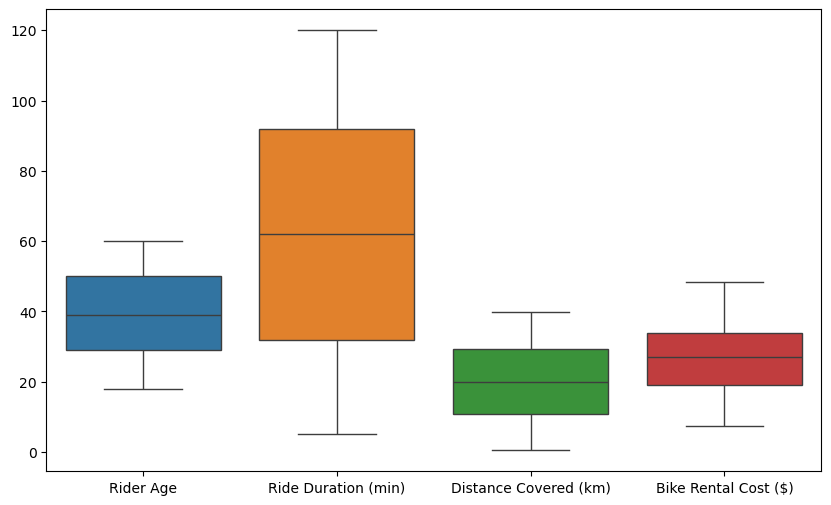

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)

In the previous boxplots, no outliers are visible. 

However in the previous data exploration I have noticed that some cyclists have a very short time for the distance they have covered. 

For example, in the line 1. 5 minutes for 21,67 km. That would mean that person went at 260 Km/hour. I will create a new feature, speed. It will help me analyze any outliers that I may be missing in distance or time because the analysis I'm performing is univariate. 

In [28]:
df ["Speed km/h"] = df["Distance Covered (km)"]/(df["Ride Duration (min)"]/60)

In [29]:
df

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),Speed km/h
0,Berlin,Rainy,53.0,Standard,62.0,2.25,High,22.63,2.177419
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87,260.040000
2,Berlin,Sunny,43.0,Electric,106.0,28.40,High,39.40,16.075472
3,San Francisco,Cloudy,24.0,Standard,119.0,5.66,Low,37.63,2.853782
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12,140.400000
...,...,...,...,...,...,...,...,...,...
895,New York,Rainy,55.0,Electric,55.0,28.35,Medium,26.30,30.927273
896,London,Cloudy,47.0,Mountain,14.0,11.99,High,13.78,51.385714
897,San Francisco,Sunny,49.0,Mountain,23.0,2.78,High,20.47,7.252174
898,Chicago,Sunny,19.0,Mountain,110.0,2.27,High,39.62,1.238182


I will check the speed for outliers

<Axes: >

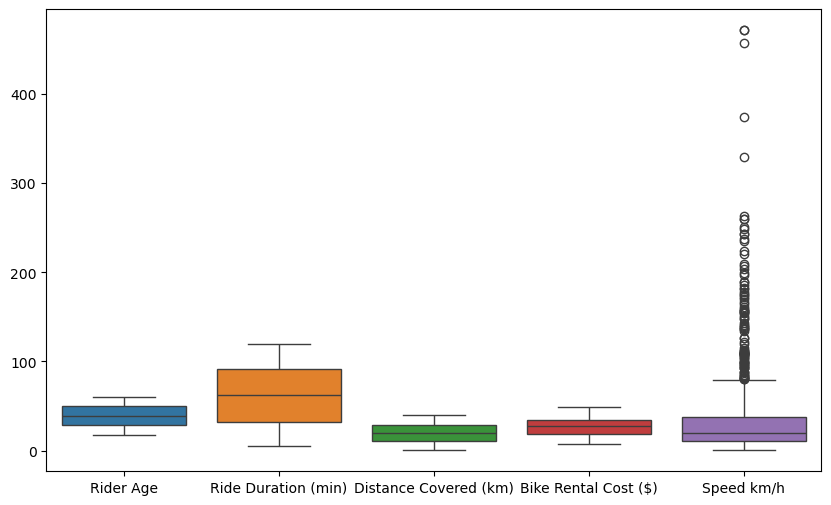

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)

I see multiple outliers in the speed feature. I calculate the interquantile distance and check for the outliers. 

In [33]:
a = df["Speed km/h"].quantile(0.75) #Calculating for the 75 percentile
b = df["Speed km/h"].quantile(0.25)#Calculating for the 25 percentile
lower_bound = b - 1.5*(a-b)
upper_bound = a + 1.5*(a-b)

In [34]:
upper_bound

79.78

In [35]:
lower_bound

-31.499999999999996

In [36]:
df_filt = df[(df['Speed km/h'] > upper_bound) ].copy()

In [37]:
df_filt.sort_values(by="Speed km/h")

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),Speed km/h
402,Chicago,Sunny,40.0,Electric,24.0,31.98,Medium,21.59,79.950000
116,San Francisco,Snowy,53.0,Standard,18.0,24.21,Medium,12.61,80.700000
568,New York,Sunny,19.0,Standard,19.0,25.74,Low,10.21,81.284211
778,Chicago,Cloudy,34.0,Electric,24.0,32.75,Low,16.96,81.875000
771,San Francisco,Sunny,40.0,Mountain,23.0,31.42,Medium,19.29,81.965217
...,...,...,...,...,...,...,...,...,...
410,Chicago,Rainy,50.0,Electric,6.0,32.91,High,18.78,329.100000
499,Berlin,Snowy,55.0,Standard,5.0,31.23,High,9.36,374.760000
798,Berlin,Rainy,30.0,Mountain,5.0,38.10,High,12.59,457.200000
574,London,Sunny,20.0,Electric,5.0,39.29,Low,19.05,471.480000


I can see that the outliers are distributed across multiple cities, bike models, rider satisfaction, and weather conditions. Therefore I don't deem necessary to go deeper into whether their handling will affect the structure of the data for any category substantially.

In [39]:
df_filt.describe()

,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($),Speed km/h
count,98.000000,98.000000,98.000000,98.000000,98.000000
mean,39.744898,12.336735,27.846735,13.616020,156.674640
std,12.800863,5.258168,7.811604,4.043826,80.315550
min,18.000000,5.000000,9.250000,7.330000,79.950000
25%,29.000000,8.000000,21.715000,10.310000,103.228247
50%,40.000000,12.000000,28.630000,13.020000,136.860989
75%,51.000000,15.000000,33.992500,16.352500,182.461607
max,60.000000,24.000000,39.570000,22.410000,471.600000


While all the distances are around the median, I can see that all the outliers have in common that the time taken was lower than the 25 percentile of the time. Therefore I will cap the maximum speed to the upper bound previously calculated and I will update the time based on that.

In [41]:
upper_bound = a + 1.5*(a-b)
df_filt["Speed km/h"] = upper_bound
df_filt

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),Speed km/h
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87,79.78
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12,79.78
27,San Francisco,Cloudy,32.0,Standard,14.0,19.73,Medium,11.59,79.78
33,New York,Cloudy,51.0,Standard,20.0,36.02,Low,14.65,79.78
37,New York,Snowy,54.0,Electric,12.0,21.85,Medium,16.74,79.78
...,...,...,...,...,...,...,...,...,...
878,Berlin,Snowy,22.0,Mountain,6.0,11.13,High,13.81,79.78
884,Chicago,Sunny,60.0,Electric,6.0,18.92,Low,17.51,79.78
889,San Francisco,Snowy,49.0,Mountain,5.0,39.30,Low,10.75,79.78
890,Chicago,Snowy,54.0,Mountain,6.0,26.31,High,15.74,79.78


In [42]:
df_filt["Ride Duration (min)"] = 60 * (df_filt["Distance Covered (km)"] / df_filt["Speed km/h"])
df_filt

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),Speed km/h
1,San Francisco,Cloudy,39.0,Standard,16.297318,21.67,Medium,7.87,79.78
4,New York,Sunny,24.0,Mountain,19.358235,25.74,Low,13.12,79.78
27,San Francisco,Cloudy,32.0,Standard,14.838305,19.73,Medium,11.59,79.78
33,New York,Cloudy,51.0,Standard,27.089496,36.02,Low,14.65,79.78
37,New York,Snowy,54.0,Electric,16.432690,21.85,Medium,16.74,79.78
...,...,...,...,...,...,...,...,...,...
878,Berlin,Snowy,22.0,Mountain,8.370519,11.13,High,13.81,79.78
884,Chicago,Sunny,60.0,Electric,14.229130,18.92,Low,17.51,79.78
889,San Francisco,Snowy,49.0,Mountain,29.556280,39.30,Low,10.75,79.78
890,Chicago,Snowy,54.0,Mountain,19.786914,26.31,High,15.74,79.78


In [43]:
df_filt.describe()

,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($),Speed km/h
count,98.000000,98.000000,98.000000,98.000000,9.800000e+01
mean,39.744898,20.942643,27.846735,13.616020,7.978000e+01
std,12.800863,5.874859,7.811604,4.043826,7.141959e-14
min,18.000000,6.956631,9.250000,7.330000,7.978000e+01
25%,29.000000,16.331161,21.715000,10.310000,7.978000e+01
50%,40.000000,21.531712,28.630000,13.020000,7.978000e+01
75%,51.000000,25.564678,33.992500,16.352500,7.978000e+01
max,60.000000,29.759338,39.570000,22.410000,7.978000e+01


In [44]:
df.update(df_filt)

In [45]:
df.describe()

,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($),Speed km/h
count,853.000000,853.000000,853.000000,853.000000,853.000000
mean,39.262603,62.757771,20.152016,26.564033,28.137938
std,12.332311,32.844263,11.226650,9.501788,24.467964
min,18.000000,6.000000,0.510000,7.330000,0.373171
25%,29.000000,32.000000,10.750000,19.110000,10.230000
50%,39.000000,62.000000,19.990000,27.080000,19.994366
75%,50.000000,92.000000,29.200000,34.010000,38.050000
max,60.000000,120.000000,39.870000,48.380000,79.780000


<Axes: >

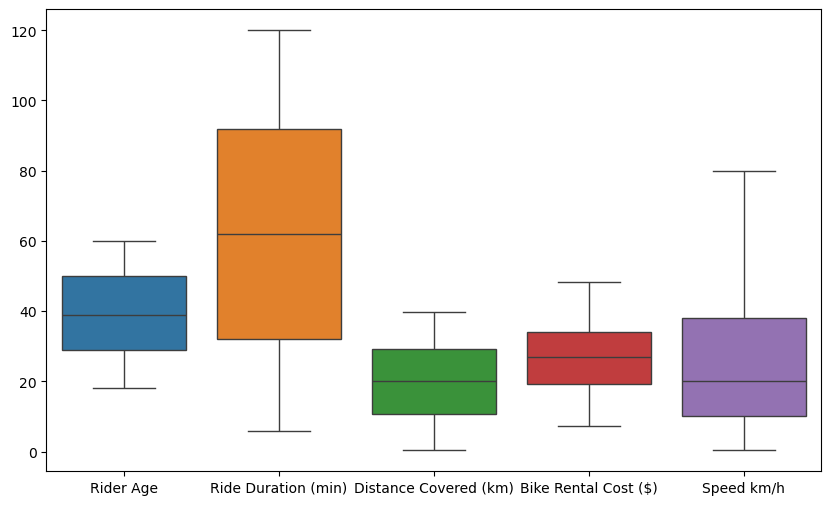

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(df)

This way the outlier speeds have been handled.

### Correlation analysis

The target variable will be customer satisfaction in this case. Since the feature is ordinal, label encoding works well.

In [50]:
df["Rider Satisfaction"].unique() #I get all the labels for the feature

array(['High', 'Medium', 'Low'], dtype=object)

In [51]:
df["Rider Satisfaction"] = df["Rider Satisfaction"].map({"High":2, "Medium":1, "Low":0}) # Label encoding

I'm going to proceed to do a correlation analysis. I'm particularly interested in what variables correlate with the bike rental cost.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 853 entries, 0 to 899
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   853 non-null    object 
 1   Weather Condition      853 non-null    object 
 2   Rider Age              853 non-null    float64
 3   Bike Model             853 non-null    object 
 4   Ride Duration (min)    853 non-null    float64
 5   Distance Covered (km)  853 non-null    float64
 6   Rider Satisfaction     853 non-null    int64  
 7   Bike Rental Cost ($)   853 non-null    float64
 8   Speed km/h             853 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 66.6+ KB


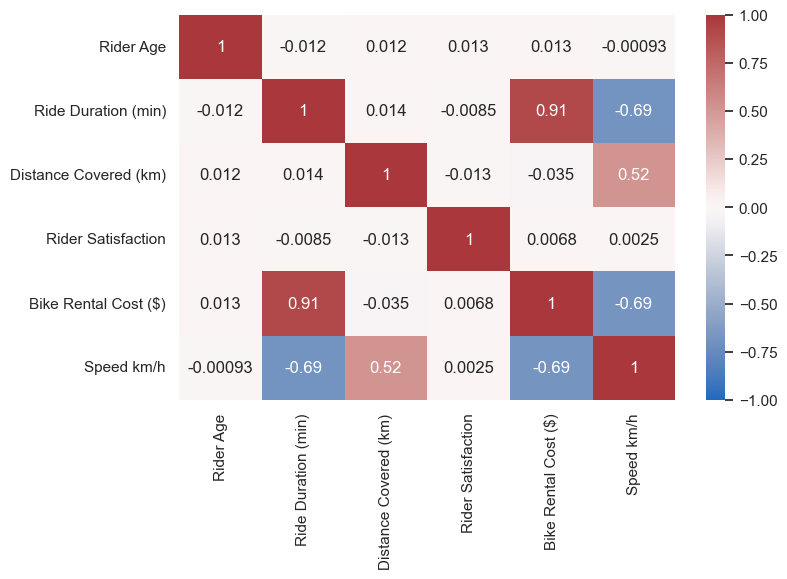

In [54]:
numeric_df = df.select_dtypes(include=['float64', "int64"]) # I ignore the int32 as they are the other categorical variables
cor_matrix = numeric_df.corr()

sns.set(rc={'figure.figsize':(8, 5)})
sns.heatmap(cor_matrix, vmin=-1, vmax=1, cmap ="vlag", annot=True) 
plt.show()

I can see the rental cost is very highly correlated with the ride duration. The target variable, rider satisfaction is not correlated with any of them.

### Feature distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


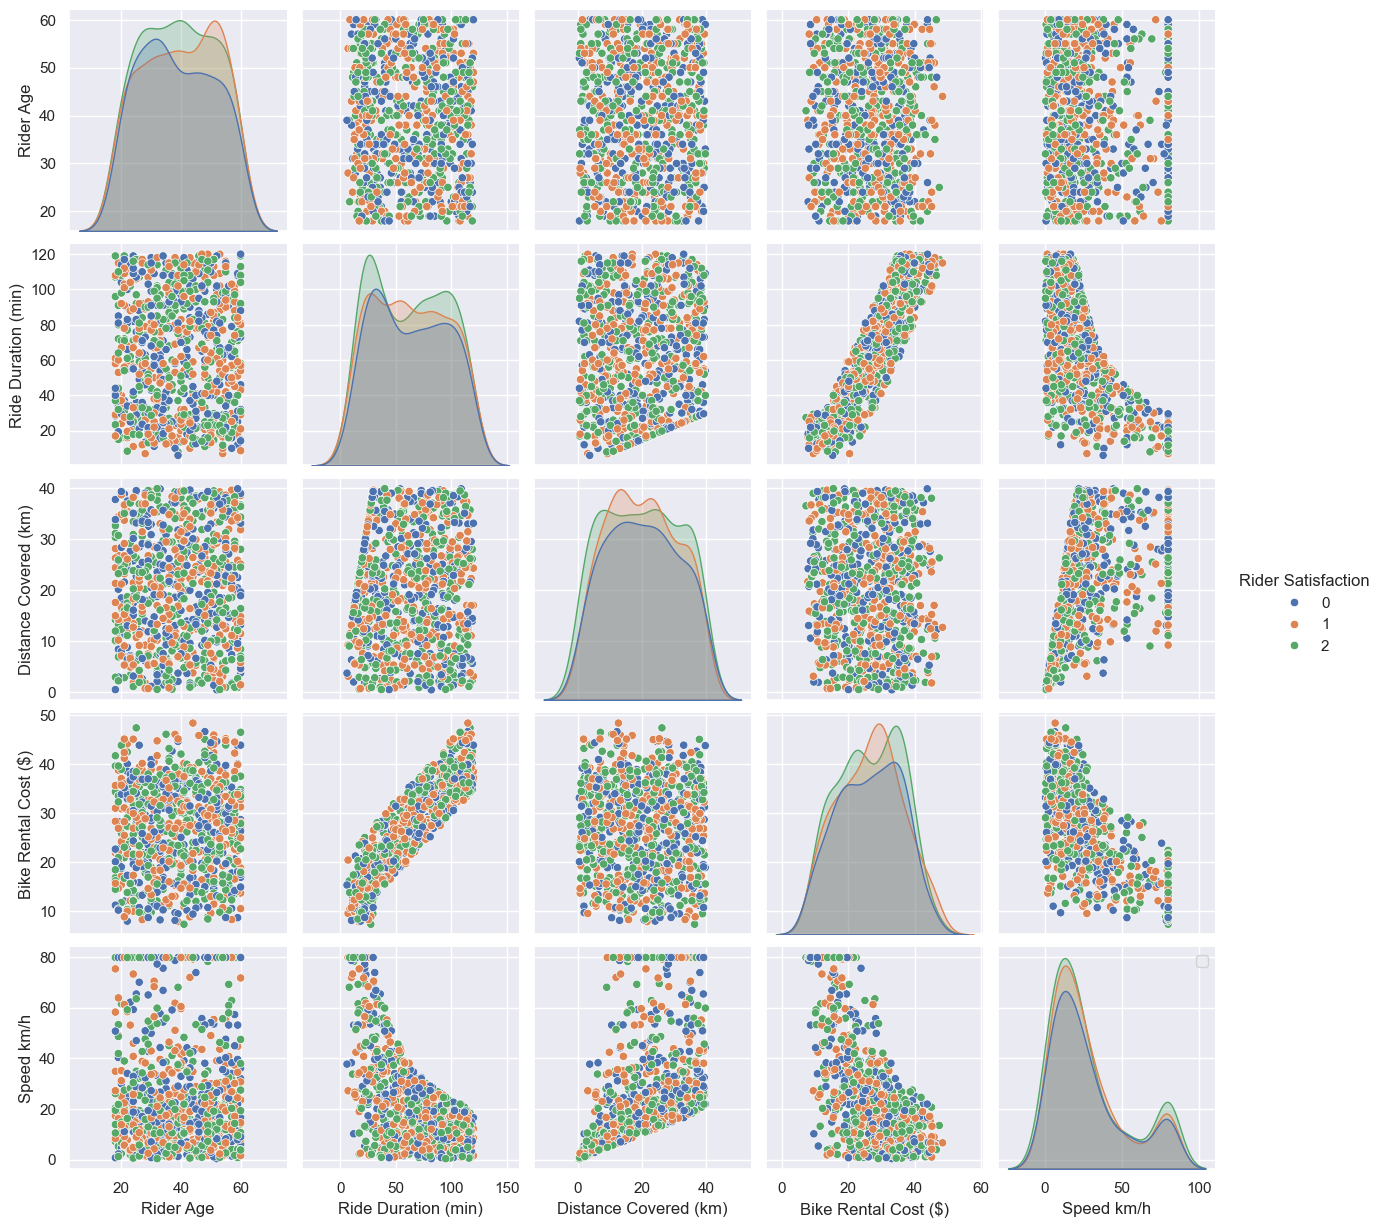

In [57]:
sns.pairplot(numeric_df,hue='Rider Satisfaction', palette = "deep") # I represent all the features against each other.
plt.legend()
plt.show()

I can see that from the variables, the one that is most similar to a Normal distribution is distance covered.

Also, there's clearly a linear correlation between bike rental cost and ride duration.
No association of variables clearly helps categorize the customer satisfaction. From these results and the previous correlation results, numerical features might not have a lot of predictive power.

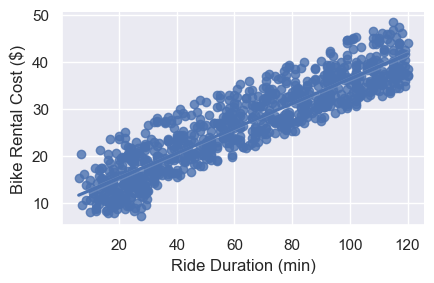

In [59]:
#Representation of cost against time
sns.lmplot(x='Ride Duration (min)', y='Bike Rental Cost ($)', data=df, height = 3, aspect = 1.5)
plt.show()

### Categorical data value counts and balance 

In [61]:
print ( df["City"].value_counts(ascending = False) , "\n")
print ( df["Bike Model"].value_counts(ascending = False) , "\n" ) 
print ( df["Weather Condition"].value_counts(ascending = False), "\n")
print ( df["Rider Satisfaction"].value_counts(ascending = False), "\n")


City
London           183
Berlin           163
New York         163
Chicago          160
San Francisco    159
Dublin            25
Name: count, dtype: int64 

Bike Model
Electric    285
Mountain    285
Standard    282
Manual        1
Name: count, dtype: int64 

Weather Condition
Rainy     238
Sunny     212
Snowy     210
Cloudy    193
Name: count, dtype: int64 

Rider Satisfaction
2    307
1    286
0    260
Name: count, dtype: int64 



There are very few observations for Dublin compared to the other cities.
Data is imbalanced for the target variable, with more customers with high satisfaction than with low satisfaction.
Also there is only one instance of the Manual category for Bike Model.

In [63]:
df[df["Bike Model"] == "Manual"]

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),Speed km/h
297,Berlin,Rainy,39.0,Manual,116.0,28.32,2,38.71,14.648276


I will assume this entry was taken incorrectly, and "manual" just means "standard"

In [65]:
df.loc[297, "Bike Model"] = "Standard"

### Feature engineering

I will now create new features.
- Cost per distance and cost per time. Customers' satisfaction may not be so affected by the cost itself, but by how much they believe it was worth it. These features will represent this better.
- The different bike models may have different qualities in different cities. I will create a new feature combining these two to account for this affecting customer satisfaction.
- Similarly, "Sunny" in different cities can mean very different things. Therefore I will also combine them.
- I will create another feature by using binning for the age feature, as the discrete differences might not be meaningful.
- Also, different prices can affect customer satisfaction differently in different cities. I will also create features for this.

In [68]:
df.head()

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($),Speed km/h
0,Berlin,Rainy,53.0,Standard,62.000000,2.25,2,22.63,2.177419
1,San Francisco,Cloudy,39.0,Standard,16.297318,21.67,1,7.87,79.780000
2,Berlin,Sunny,43.0,Electric,106.000000,28.40,2,39.40,16.075472
3,San Francisco,Cloudy,24.0,Standard,119.000000,5.66,0,37.63,2.853782
4,New York,Sunny,24.0,Mountain,19.358235,25.74,0,13.12,79.780000


In [69]:
df["Cost per distance"] = df["Bike Rental Cost ($)"] / df["Distance Covered (km)"] # Creating feature by division
df["Cost per time"] = df["Bike Rental Cost ($)"] / df["Ride Duration (min)"] # Creating feature by division



In [70]:
df["City-BModel"] = df["City"] + "-" + df["Bike Model"] # Creating feature by concatenation
df["City-Weather"] = df["City"] + "-" + df["Weather Condition"]

In [71]:
df = pd.concat ( [df, pd.get_dummies(df["City"]), pd.get_dummies(df["Weather Condition"]), pd.get_dummies(df["Bike Model"]) ], axis = 1) 
# One hot encoding of categorical variables, to know if the presence of any


Also age and the choice of bike, and age and the weather can be influencing the satisfaction levels, so I will create more features for these.
Same for age and price ( in this case i will just multiply them to connect them)

In [73]:
age_labels = ["0-12", "13-17", "18-24", "25-34", "35-44", "45-54", "55-64"]
df["Age Binned"] = pd.cut(df["Rider Age"], bins = [0, 12 , 17, 24, 34, 44, 54, 64] , labels = age_labels).astype("object")
# until 54 because maximum age is 60
df["Age-Weather"] = df["Age Binned"] + " | " + df["Weather Condition"]
df["Age-BModel"] = df["Age Binned"] + " | " + df["Bike Model"]
df["Age*Cost"] = df["Rider Age"] * df["Bike Rental Cost ($)"]

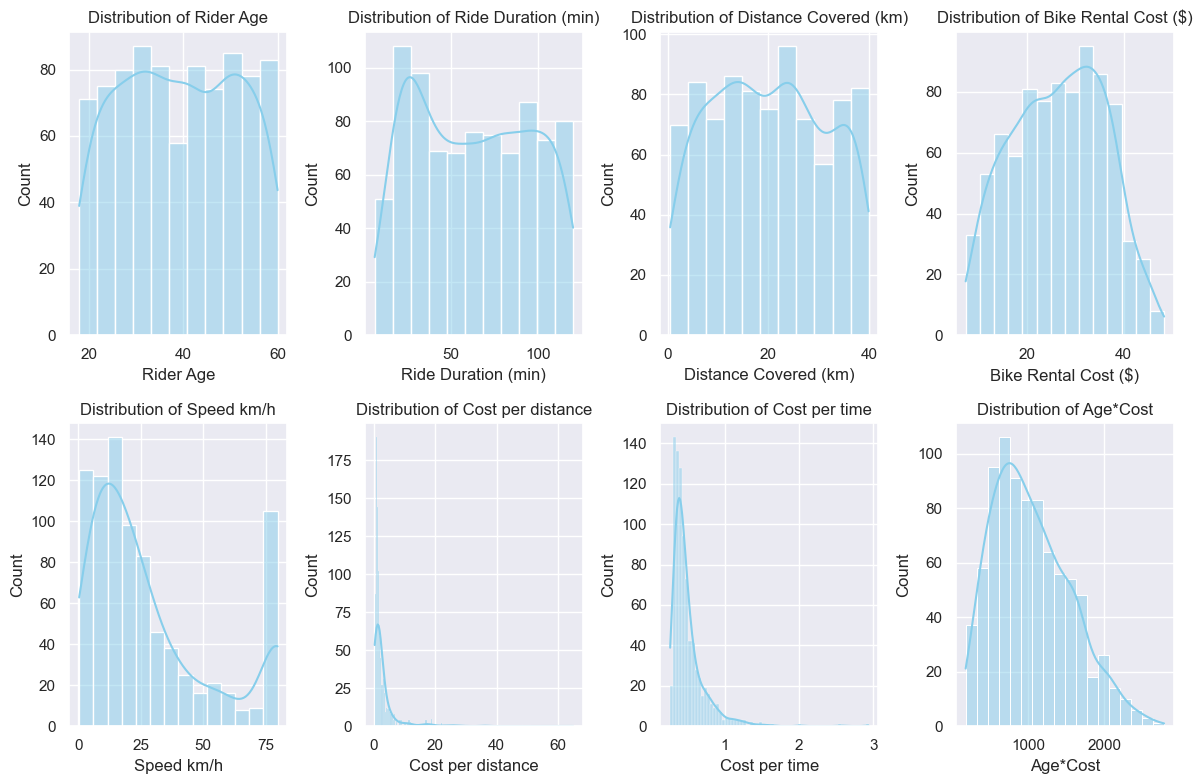

In [74]:
# Visualize distribution of numerical features (excluding the target variable)
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop('Rider Satisfaction', axis=1)

# Adjust grid size for the number of features
n_features = len(numerical_features.columns)
n_cols = 4  # Number of columns
n_rows = (n_features // n_cols) + (n_features % n_cols > 0)  # Dynamic number of rows

plt.figure(figsize=(12, n_rows * 4))
for i, feature in enumerate(numerical_features.columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Create a grid of subplots dynamically
    sns.histplot(numerical_features[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [75]:
numeric_df = df.select_dtypes(include=['float64', "int64"]) 

In [76]:
numeric_df.skew().sort_values(ascending=False)

Cost per distance        5.427162
Cost per time            3.664663
Speed km/h               1.072135
Age*Cost                 0.616617
Ride Duration (min)      0.087616
Distance Covered (km)    0.048684
Rider Age               -0.000079
Bike Rental Cost ($)    -0.048598
Rider Satisfaction      -0.101328
dtype: float64

Since some of these features are highly skewed, I will use transformations to make the values less skewed. I will also delete the feature for Dublin, as it is due to there being very few entries for this city in the data.

In [78]:
df.columns

Index(['City', 'Weather Condition', 'Rider Age', 'Bike Model',
       'Ride Duration (min)', 'Distance Covered (km)', 'Rider Satisfaction',
       'Bike Rental Cost ($)', 'Speed km/h', 'Cost per distance',
       'Cost per time', 'City-BModel', 'City-Weather', 'Berlin', 'Chicago',
       'Dublin', 'London', 'New York', 'San Francisco', 'Cloudy', 'Rainy',
       'Snowy', 'Sunny', 'Electric', 'Mountain', 'Standard', 'Age Binned',
       'Age-Weather', 'Age-BModel', 'Age*Cost'],
      dtype='object')

In [79]:
# I have tried both logarithms and elevating the columns, and have come with these as the best results:
features = ['Age*Cost', "Speed km/h"]
features2 = ['Cost per distance', 'Cost per time']
df[["log" + feat for feat in features2]] = df[features2].apply(lambda x: np.log(x))
df[[feat + '**0.2' for feat in features]] = df[features]** (1/5)

features.extend(features2)

In [80]:
df.drop(features , axis = 1, inplace = True)
numeric_df = df.select_dtypes(include=['float64', "int64"]) 
numeric_df.skew().sort_values(ascending=False)

logCost per time         1.336179
logCost per distance     0.933400
Ride Duration (min)      0.087616
Distance Covered (km)    0.048684
Rider Age               -0.000079
Bike Rental Cost ($)    -0.048598
Rider Satisfaction      -0.101328
Speed km/h**0.2         -0.152526
Age*Cost**0.2           -0.236998
dtype: float64

A great reduction in the skewdness of the data can be seen.

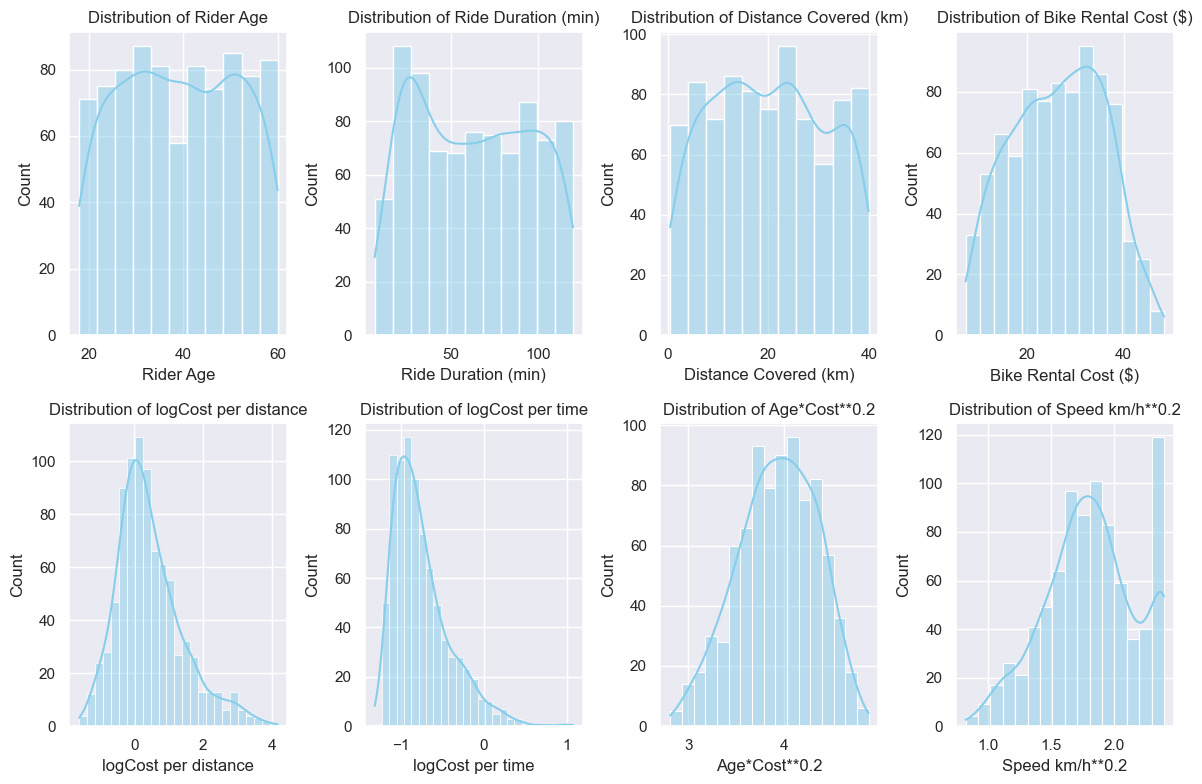

In [82]:
# Visualize distribution of numerical features (excluding the target variable)
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop('Rider Satisfaction', axis=1)

# Adjust grid size for the number of features
n_features = len(numerical_features.columns)
n_cols = 4  # Number of columns
n_rows = (n_features // n_cols) + (n_features % n_cols > 0)  # Dynamic number of rows

plt.figure(figsize=(12, n_rows * 4))
for i, feature in enumerate(numerical_features.columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Create a grid of subplots dynamically
    sns.histplot(numerical_features[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

### Chi square and correlation analysis

I will analyse the relationship between the categorical variables and the target variable ( Rider Satisfaction ).
Also the correlation between the variables again.

In [85]:
from scipy.stats import chi2_contingency

data = df.select_dtypes(include=["bool", "int32"])

data["Rider Satisfaction"] = df["Rider Satisfaction"]
for feature in data.columns:
    # Create a contingency table
    contingency_table = pd.crosstab(data[feature], data['Rider Satisfaction'])
    
    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Output the result
    # Interpretation
    if p < 0.05:
        print(f"{feature} is DEPENDENT on the Target variable.\n")
    else:
        print(f"{feature} is independent of the Target variable.\n")

Berlin is independent of the Target variable.

Chicago is independent of the Target variable.

Dublin is independent of the Target variable.

London is independent of the Target variable.

New York is independent of the Target variable.

San Francisco is independent of the Target variable.

Cloudy is independent of the Target variable.

Rainy is independent of the Target variable.

Snowy is DEPENDENT on the Target variable.

Sunny is independent of the Target variable.

Electric is independent of the Target variable.

Mountain is independent of the Target variable.

Standard is independent of the Target variable.

Rider Satisfaction is DEPENDENT on the Target variable.



I can see that only whether it is snowy or not is related to  the target variable

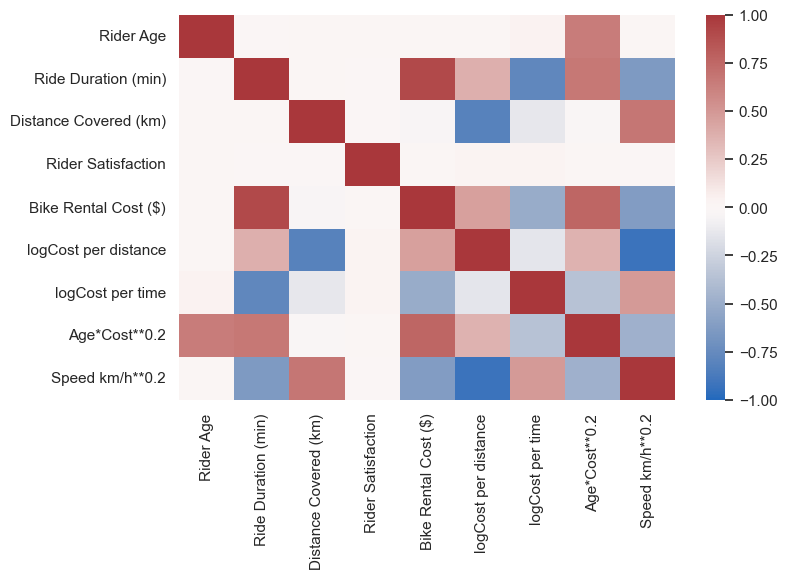

In [87]:
numeric_df = df.select_dtypes(include=['float64', "int64"]) # I ignore the int32 as they are the other categorical variables
cor_matrix = numeric_df.corr()

sns.set(rc={'figure.figsize':(8, 5)})
sns.heatmap(cor_matrix, vmin=-1, vmax=1, cmap ="vlag", annot=False) 
plt.show()

### Categorical variables encoding

In [89]:
le = LabelEncoder() # For the rest of the variables I use a library to do it.

# Apply label encoding to all categorical columns
for column in df.select_dtypes("object").columns:
    df[column] = le.fit_transform(df[column])

### Feature selection

Most of the features might not be very relevant in the prediction of the target variable.

Therefore, I will use a ML algorithm to assess the feature importance of both the target and categorical variables. 

This will help make the ML algorithm more robust, generalizing better and more simple.

In [92]:
x = df.drop(["Rider Satisfaction"], axis = 1 )
y = df["Rider Satisfaction"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15,  random_state = 42, stratify = y) 
# Divide data into test and training while keeping the same distribution.

#### Scaling

In [94]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
scaler = StandardScaler()
x_tr_scaled = scaler.fit_transform(x_train) # I scale according to the training data
x_te_scaled = scaler.transform(x_test) # I use the same transformation on the test data

In [95]:
# I calculate the inverse of the frequency for each feature.
df.shape[0] / df["Rider Satisfaction"].value_counts(ascending = False)

Rider Satisfaction
2    2.778502
1    2.982517
0    3.280769
Name: count, dtype: float64

In [96]:
rf = RandomForestClassifier(n_estimators = 10000, random_state = 42, criterion = "entropy", class_weight = {0 : 3.280769, 1: 2.982517, 2: 2.778502} ) 
# I introduce class weights as the dataset is imbalanced. I use the inverse of the frequency for this.
rf.fit(x_tr_scaled, y_train )
y_pred = rf.predict(x_te_scaled)
print(classification_report(y_test, y_pred))
importance = dict(zip(x.columns, rf.feature_importances_)) # Getting the importance indexes

              precision    recall  f1-score   support

           0       0.32      0.26      0.29        39
           1       0.34      0.37      0.36        43
           2       0.40      0.43      0.42        46

    accuracy                           0.36       128
   macro avg       0.35      0.35      0.35       128
weighted avg       0.36      0.36      0.36       128



The model is too simple and is underfitting. Therefore I will fine tune its parameters to get a better accuracy.

In [98]:
param_dist = {
    "n_estimators" : [100, 500, 1000, 10000],
    "criterion" : ["entropy", "gini"],
    "max_features" : ["sqrt", "log2", None],
    "class_weight" : [{0 : 3.280769, 1: 2.982517, 2: 2.778502}],
    "random_state" : [42]
}

In [99]:
model = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=10, cv=4, verbose=1, random_state=42)
random_search_result = random_search.fit(x_train, y_train)
print("Best Hyperparameters Found: ", random_search_result.best_params_)
best_model = random_search_result.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))
importance = dict(zip(x.columns, best_model.feature_importances_))

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best Hyperparameters Found:  {'random_state': 42, 'n_estimators': 100, 'max_features': 'sqrt', 'criterion': 'entropy', 'class_weight': {0: 3.280769, 1: 2.982517, 2: 2.778502}}
              precision    recall  f1-score   support

           0       0.34      0.28      0.31        39
           1       0.33      0.35      0.34        43
           2       0.41      0.46      0.43        46

    accuracy                           0.37       128
   macro avg       0.36      0.36      0.36       128
weighted avg       0.36      0.37      0.36       128



Even through a Randomized Search, I cannot improve the accuracy of the model. Therefore, I will discard the Random Forest algorithm for feature selection and use another method.

In [101]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(estimator=model)  # Select top 5 features

rfe = rfe.fit(x_tr_scaled, y_train)

rfe.ranking_

array([13,  9,  1,  1,  1,  1,  1,  5, 15, 14,  2,  7,  1, 10, 11, 12,  8,
        1,  1,  3, 16,  4,  1,  1,  6,  1,  1,  1,  1])

In [102]:
ranks = pd.DataFrame(zip(x.columns, rfe.ranking_))
ranks[ranks[1] == 1]
# Where the ranks are equal to 1 

,0,1
2,Rider Age,1
3,Bike Model,1
4,Ride Duration (min),1
5,Distance Covered (km),1
6,Bike Rental Cost ($),1
12,London,1
17,Snowy,1
18,Sunny,1
22,Age Binned,1
23,Age-Weather,1


I'll check the accuracy of the model to see if I can really trust the results:

In [104]:
model = LogisticRegression()
model.fit(x_tr_scaled, y_train)
y_pred = model.predict(x_te_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.22      0.18      0.20        39
           1       0.17      0.14      0.15        43
           2       0.27      0.35      0.30        46

    accuracy                           0.23       128
   macro avg       0.22      0.22      0.22       128
weighted avg       0.22      0.23      0.22       128



Accuracy is even lower than before, therefore I won't use this.

Let's try with another classifier to see if the accuracy can be improved:

In [107]:
from sklearn.neural_network import MLPClassifier

dt = MLPClassifier(hidden_layer_sizes=(200,2000,200,100), random_state = 42) 


In [108]:
dt.fit(x_tr_scaled, y_train )
y_pred = dt.predict(x_te_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.21      0.26        39
           1       0.38      0.56      0.45        43
           2       0.51      0.46      0.48        46

    accuracy                           0.41       128
   macro avg       0.41      0.41      0.40       128
weighted avg       0.42      0.41      0.40       128



This is up to now the best accuracy, but the model is still underfitting even though it has many layers.

This low accuracy is probably because the features are not good at predicting customer satisfaction. 

More features could be collected, ( especially related to time ) like season, bicycle age and time of last repair...

# Target feature change

Since customer satisfaction cannot be inferred from the rest of the data, I will use time as the variable.

In [112]:
#Creating Time features
step = 20 # how big the time difference is between each step
bins = range(0,140,20) # limits of the Time features
time_labels = [str(bin-step) +"-"+ str(bin) for bin in bins ]
time_labels.pop(0) # first element is -step - 0 so I delete it
ord_labels = [a for a, el in enumerate(time_labels)] # Create the ordinal labels

df["Time Binned"] = pd.cut(df["Ride Duration (min)"], bins = bins  , labels = time_labels).astype("object")
df = pd.concat ( [df, pd.get_dummies(df["Time Binned"])], axis = 1)

df["Time Binned"] = df["Time Binned"].map(dict(zip(time_labels, ord_labels))).astype("int32")

In [113]:
from scipy.stats import chi2_contingency

data = df.select_dtypes(include=["bool", "int32"])

possible_targets = time_labels + ["Time Binned"]
data["Rider Satisfaction"] = df["Rider Satisfaction"]
for target_feature in possible_targets:
    dependent_features = []
    for feature in data.columns:
        
        # Create a contingency table
        contingency_table = pd.crosstab(data[feature], data[target_feature])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
    
        # Interpretation
        if p < 0.05:
            if feature not in possible_targets:
                dependent_features.append(feature)
    print (f'{target_feature} is related with {dependent_features}' ) 

0-20 is related with ['Bike Model', 'Standard']
20-40 is related with []
40-60 is related with ['Bike Model', 'City-Weather', 'Standard', 'Rider Satisfaction']
60-80 is related with []
80-100 is related with ['Dublin']
100-120 is related with []
Time Binned is related with ['Bike Model', 'Standard']


It's interesting to note that a time of 0-20 is related to using the Standard bike model. Some people may be getting tired and leaving too early because of using this type. It's also dependent with staying around the 40-60 mark.

It's also interesting that 80-100 is dependent with Dublin. It might be that in Dublin people tend to do this amount of time.

### Feature selection

In [116]:
target_variable = "Time Binned"
feat_drop_time = possible_targets + ['Speed km/h**0.2','Ride Duration (min)','logCost per time']


In [117]:
x = df.drop(feat_drop_time, axis = 1 )
y = df[target_variable]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15,  random_state = 42, stratify = y) 
# Divide data into test and training while keeping the same distribution.
class_weight = (y_train.count() / y_train.value_counts()).to_dict() # I get the class weights from the training data

rf = RandomForestClassifier(n_estimators = 10000, random_state = 42, criterion = "gini", class_weight = class_weight ) 
# I introduce class weights as the dataset is imbalanced. I use the inverse of the frequency for this.
rf.fit(x_train, y_train )
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
importance = dict(zip(x.columns, rf.feature_importances_)) # Getting the importance indexes

              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.69      0.69      0.69        29
           2       0.54      0.65      0.59        20
           3       0.53      0.48      0.50        21
           4       0.42      0.36      0.39        22
           5       0.72      0.82      0.77        22

    accuracy                           0.60       128
   macro avg       0.59      0.59      0.59       128
weighted avg       0.60      0.60      0.60       128



In [118]:
pd.Series(importance).sort_values()

Dublin                   0.003088
San Francisco            0.005249
Berlin                   0.005743
Chicago                  0.006806
Cloudy                   0.006814
New York                 0.007257
London                   0.008050
Sunny                    0.008192
Rainy                    0.008630
Snowy                    0.008895
Mountain                 0.009859
Standard                 0.013454
Electric                 0.015450
Age Binned               0.017919
City                     0.018164
Weather Condition        0.019000
Rider Satisfaction       0.024083
Bike Model               0.024139
Age-BModel               0.030646
City-BModel              0.031292
City-Weather             0.037417
Age-Weather              0.038468
Rider Age                0.062587
Distance Covered (km)    0.091711
logCost per distance     0.101540
Age*Cost**0.2            0.131023
Bike Rental Cost ($)     0.264523
dtype: float64

In [119]:
ps_imp = pd.Series(importance) 
feat_drop = ps_imp[ps_imp < 0.01 ].index.tolist() # The features with an importance less than 0.01 are deleted

feat_drop_time = possible_targets + ['Speed km/h**0.2','Ride Duration (min)','logCost per time']
feat_drop_all = feat_drop + feat_drop_time

x = df.drop(feat_drop_all, axis = 1 )
y = df[target_variable]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15,  random_state = 42, stratify = y) 
# Divide data into test and training while keeping the same distribution.

class_weight = (y_train.count() / y_train.value_counts()).to_dict() # I get the class weights from the training data by using inverse frequencies
rf = RandomForestClassifier(n_estimators = 10000, random_state = 42, criterion = "gini", class_weight = class_weight) 
# I introduce class weights as the dataset is imbalanced. I use the inverse of the frequency for this.
rf.fit(x_train, y_train )
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
importance = dict(zip(x.columns, rf.feature_importances_)) # Getting the importance indexes

              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.68      0.66      0.67        29
           2       0.48      0.60      0.53        20
           3       0.53      0.48      0.50        21
           4       0.53      0.41      0.46        22
           5       0.70      0.86      0.78        22

    accuracy                           0.60       128
   macro avg       0.60      0.60      0.59       128
weighted avg       0.60      0.60      0.60       128



Without these features, the model is more simple but hasn't lost its accuracy.

<Axes: xlabel='Predicted Type', ylabel='Actual Type'>

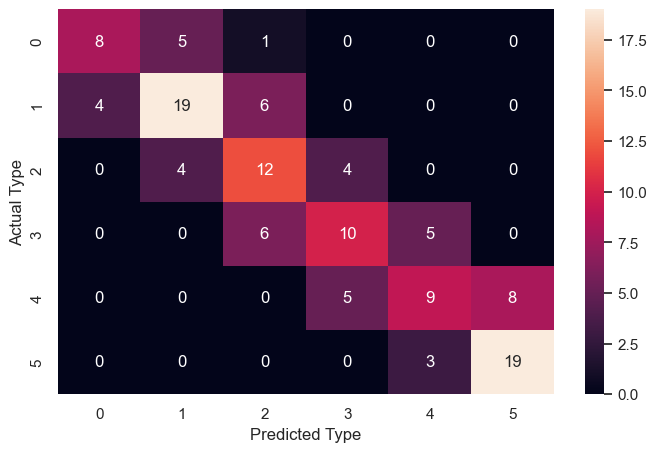

In [121]:
# Create a DataFrame to display actual and predicted values
results = pd.DataFrame()
results["Actual_value"] = y_test
results["Prediction"] = y_pred


# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(results["Actual_value"], results["Prediction"])

# Call a method heatmap() to plot confusion matrix
plot = sns.heatmap(cm, annot = True)
plot.set(ylabel = "Actual Type", xlabel = "Predicted Type")
plot

Interestingly, the mistakes are done in an escalonated way such that precision would greatly increase if I merged the labels in groups of 2:


<Axes: xlabel='Predicted Type', ylabel='Actual Type'>

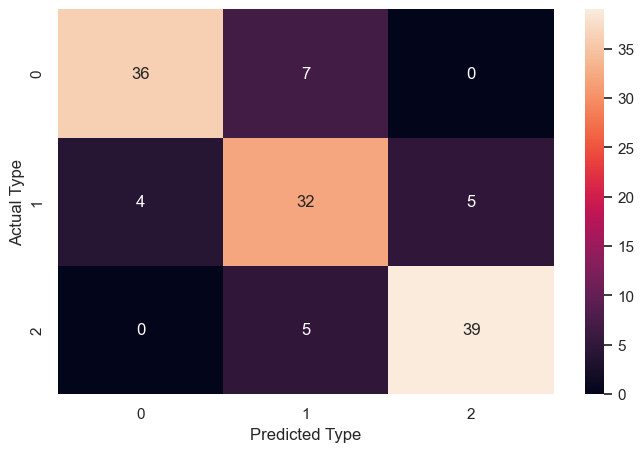

In [123]:
#Changing the results by aggrupating them
for n in (range (0,6,2)):
    results.loc[(results["Actual_value"] == n) | (results["Actual_value"] == n+1), "Actual_value"] = n//2
    results.loc[(results["Prediction"] == n) | (results["Prediction"] == n+1), "Prediction"] = n//2

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(results["Actual_value"], results["Prediction"])

# Call a method heatmap() to plot confusion matrix
plot = sns.heatmap(cm, annot = True)
plot.set(ylabel = "Actual Type", xlabel = "Predicted Type")
plot

In [124]:
print(classification_report(results["Actual_value"], results["Prediction"]))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.73      0.78      0.75        41
           2       0.89      0.89      0.89        44

    accuracy                           0.84       128
   macro avg       0.84      0.83      0.84       128
weighted avg       0.84      0.84      0.84       128



In [125]:
pd.Series(importance).sort_values(ascending= False)

Bike Rental Cost ($)     0.298947
Age*Cost**0.2            0.132266
logCost per distance     0.105699
Distance Covered (km)    0.097665
Rider Age                0.063187
City-Weather             0.043888
Age-Weather              0.040957
City-BModel              0.035293
Bike Model               0.032052
Age-BModel               0.029641
Weather Condition        0.024362
Rider Satisfaction       0.022939
City                     0.021108
Electric                 0.020118
Standard                 0.016778
Age Binned               0.015101
dtype: float64

I can see that the most important variables are related to cost, age and distance.

It would be interesting to create additional routes the bikes can take that are longer so more time is spent. Additionally, depending on the model of the bike rental, it looks like the cost is greatly related as well.

## Finding the best model

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

### First split ( 0.15 ) 

In [130]:
#Models that I'm going to use
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "Neural Network": MLPClassifier(random_state=42)
}

In [131]:
#Parameters

param_grids = {
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ['lbfgs', 'liblinear'],
        "penalty": ['l2']
    },
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [25, 50, 100],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "k-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9, 11],
        "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    "Support Vector Machine": {
        "C": [0.1, 5],
        "kernel": ['rbf'],
        "gamma": ['scale', 'auto']
    },

    "Neural Network": {
        "hidden_layer_sizes": [(50,), (100,), (50), (50,100)],    
        "activation": [ 'relu', 'logistic', 'tanh'],
        "solver": ['adam', 'sgd'],
        "learning_rate": ['constant', 'adaptive']
    }
}

In [132]:
x = df.drop(feat_drop_all, axis = 1 )
y = df[target_variable]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15,  random_state = 42, stratify = y) 


# Scaling 
scaler = StandardScaler()

x_tr_scaled = scaler.fit_transform(x_train.select_dtypes(include=['float64'])) # I scale according to the training data, selecting numerical values
x_tr_scaled = pd.DataFrame(x_tr_scaled, columns = x_train.select_dtypes(include=['float64']).columns)  # I add all the values into the dataframe
x_tr_scaled = pd.concat ([x_tr_scaled, x_train.select_dtypes(include=['int32',"int64", "bool"]).reset_index(drop = True)], axis = 1) 
# Variable with both the categorical and numerical features

# I use the same transformation on the test data
x_te_scaled = scaler.transform(x_test.select_dtypes(include=['float64'])) 
x_te_scaled = pd.DataFrame(x_te_scaled, columns = x_test.select_dtypes(include=['float64']).columns)  # I add all the values into the dataframe
x_te_scaled = pd.concat ([x_te_scaled, x_test.select_dtypes(include=['int32',"int64", "bool"]).reset_index(drop = True )], axis = 1)

# I use SMOTENC to oversample the minority classes
from imblearn.over_sampling import SMOTENC

smote = SMOTENC(categorical_features = x_tr_scaled.select_dtypes(include=["int32","int64","bool"]).columns.tolist())

x_res, y_res = smote.fit_resample(x_tr_scaled, y_train)

In [133]:
results = []
accuracies = []
for name, model in classifiers.items():
    print(f"Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv = 10, n_jobs = -1, verbose = 2)
    grid_search.fit(x_res, y_res)
    # I get the best parameters for the model
    best_model = grid_search.best_estimator_ 
    
    # Predict with the best model
    y_pred = best_model.predict(x_te_scaled)
    y_tr_pred = best_model.predict(x_res)
    # Calculate metrics test
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    # Calculate metrics training
    tr_accuracy = accuracy_score(y_res, y_tr_pred )
    # See over or underfitting
    if tr_accuracy - accuracy > 0.1:
        results.append([name, accuracy, precision, recall, f1_score, grid_search.best_params_ , "Overfitted"])   
    elif tr_accuracy < 0.5 and accuracy < 0.5:
        results.append([name, accuracy, precision, recall, f1_score, grid_search.best_params_ , "Underfitted"])
    else:
        results.append([name, accuracy, precision, recall, f1_score, grid_search.best_params_ , "Good fit"])
    accuracies.append([name,accuracy, tr_accuracy])   
    
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Best parameters", "Model fit"])
acc_df = pd.DataFrame(accuracies, columns = ["Model","Test Accuracy", "Training Accuracy"])

display(results_df)
display(acc_df)

Running GridSearchCV for Logistic Regression...
Fitting 10 folds for each of 6 candidates, totalling 60 fits


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Running GridSearchCV for Decision Tree...
Fitting 10 folds for each of 45 candidates, totalling 450 fits
Running GridSearchCV for Random Forest...
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Running GridSearchCV for k-Nearest Neighbors...
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Running GridSearchCV for Support Vector Machine...
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Running GridSearchCV for Neural Network...
Fitting 10 folds for each of 48 candidates, totalling 480 fits


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1 Score,Best parameters,Model fit
0,Logistic Regression,0.718750,0.717345,0.718750,0.717644,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",Good fit
1,Decision Tree,0.632812,0.629040,0.632812,0.628201,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",Overfitted
2,Random Forest,0.593750,0.591199,0.593750,0.587877,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",Overfitted
3,k-Nearest Neighbors,0.210938,0.228418,0.210938,0.196624,"{'algorithm': 'auto', 'n_neighbors': 3}",Overfitted
4,Support Vector Machine,0.554688,0.554626,0.554688,0.552098,"{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}",Overfitted
5,Neural Network,0.718750,0.721392,0.718750,0.717654,"{'activation': 'tanh', 'hidden_layer_sizes': (...",Overfitted


,Model,Test Accuracy,Training Accuracy
0,Logistic Regression,0.718750,0.749495
1,Decision Tree,0.632812,0.904040
2,Random Forest,0.593750,0.982828
3,k-Nearest Neighbors,0.210938,0.653535
4,Support Vector Machine,0.554688,0.693939
5,Neural Network,0.718750,0.874747


For this split it's clear that the neural network and logistic regression are working the best.

### Second split ( 0.25 ) 

In [136]:
x = df.drop(feat_drop_all, axis = 1 )
y = df[target_variable]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,  random_state = 42, stratify = y) 


# Scaling 
scaler = StandardScaler()

x_tr_scaled = scaler.fit_transform(x_train.select_dtypes(include=['float64'])) # I scale according to the training data, selecting numerical values
x_tr_scaled = pd.DataFrame(x_tr_scaled, columns = x_train.select_dtypes(include=['float64']).columns)  # I add all the values into the dataframe
x_tr_scaled = pd.concat ([x_tr_scaled, x_train.select_dtypes(include=['int32',"int64", "bool"]).reset_index(drop = True)], axis = 1) 
# Variable with both the categorical and numerical features

# I use the same transformation on the test data
x_te_scaled = scaler.transform(x_test.select_dtypes(include=['float64'])) 
x_te_scaled = pd.DataFrame(x_te_scaled, columns = x_test.select_dtypes(include=['float64']).columns)  # I add all the values into the dataframe
x_te_scaled = pd.concat ([x_te_scaled, x_test.select_dtypes(include=['int32',"int64", "bool"]).reset_index(drop = True )], axis = 1)

# I use SMOTENC to oversample the minority classes
from imblearn.over_sampling import SMOTENC

smote = SMOTENC(categorical_features = x_tr_scaled.select_dtypes(include=["int32","int64","bool"]).columns.tolist())

x_res, y_res = smote.fit_resample(x_tr_scaled, y_train)

In [137]:
results = []
accuracies = []
for name, model in classifiers.items():
    print(f"Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv = 10, n_jobs = -1, verbose = 2)
    grid_search.fit(x_res, y_res)
    # I get the best parameters for the model
    best_model = grid_search.best_estimator_ 
    
    # Predict with the best model
    y_pred = best_model.predict(x_te_scaled)
    y_tr_pred = best_model.predict(x_res)
    # Calculate metrics test
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    # Calculate metrics training
    tr_accuracy = accuracy_score(y_res, y_tr_pred )
    # See over or underfitting
    if tr_accuracy - accuracy > 0.1:
        results.append([name, accuracy, precision, recall, f1_score, grid_search.best_params_ , "Overfitted"])   
    elif tr_accuracy < 0.5 and accuracy < 0.5:
        results.append([name, accuracy, precision, recall, f1_score, grid_search.best_params_ , "Underfitted"])
    else:
        results.append([name, accuracy, precision, recall, f1_score, grid_search.best_params_ , "Good fit"])
    accuracies.append([name,accuracy, tr_accuracy])   
    
results2_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Best parameters", "Model fit"])
acc_df = pd.DataFrame(accuracies, columns = ["Model","Test Accuracy", "Training Accuracy"])

display(results2_df)
display(acc_df)

Running GridSearchCV for Logistic Regression...
Fitting 10 folds for each of 6 candidates, totalling 60 fits


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Running GridSearchCV for Decision Tree...
Fitting 10 folds for each of 45 candidates, totalling 450 fits
Running GridSearchCV for Random Forest...
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Running GridSearchCV for k-Nearest Neighbors...
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Running GridSearchCV for Support Vector Machine...
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Running GridSearchCV for Neural Network...
Fitting 10 folds for each of 48 candidates, totalling 480 fits


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1 Score,Best parameters,Model fit
0,Logistic Regression,0.682243,0.681183,0.682243,0.681243,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",Good fit
1,Decision Tree,0.593458,0.590270,0.593458,0.589363,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",Overfitted
2,Random Forest,0.630841,0.633183,0.630841,0.629762,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",Overfitted
3,k-Nearest Neighbors,0.233645,0.237846,0.233645,0.232814,"{'algorithm': 'auto', 'n_neighbors': 5}",Overfitted
4,Support Vector Machine,0.490654,0.484071,0.490654,0.482577,"{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}",Overfitted
5,Neural Network,0.700935,0.703131,0.700935,0.701064,"{'activation': 'logistic', 'hidden_layer_sizes...",Good fit


,Model,Test Accuracy,Training Accuracy
0,Logistic Regression,0.682243,0.743678
1,Decision Tree,0.593458,0.874713
2,Random Forest,0.630841,1.000000
3,k-Nearest Neighbors,0.233645,0.626437
4,Support Vector Machine,0.490654,0.689655
5,Neural Network,0.700935,0.736782


For this split too, it's clear that the logistic regression is working the best.

In [139]:
#The best model is the Neural Network from the first iteration
results_df

,Model,Accuracy,Precision,Recall,F1 Score,Best parameters,Model fit
0,Logistic Regression,0.718750,0.717345,0.718750,0.717644,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",Good fit
1,Decision Tree,0.632812,0.629040,0.632812,0.628201,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",Overfitted
2,Random Forest,0.593750,0.591199,0.593750,0.587877,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",Overfitted
3,k-Nearest Neighbors,0.210938,0.228418,0.210938,0.196624,"{'algorithm': 'auto', 'n_neighbors': 3}",Overfitted
4,Support Vector Machine,0.554688,0.554626,0.554688,0.552098,"{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}",Overfitted
5,Neural Network,0.718750,0.721392,0.718750,0.717654,"{'activation': 'tanh', 'hidden_layer_sizes': (...",Overfitted
